In [31]:
import pandas as pd

In [32]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\DATA\weather_data.csv")

In [33]:
df.sample(10)

,Location,Date,Temperature(C),Rainfall(mm)
239,L04,2024-02-29,16.4,10
378,L07,2024-01-19,34.7,20
156,L03,2024-02-06,27.9,0
334,L06,2024-02-04,23.3,10
441,L08,2024-01-22,25.6,10
594,L10,2024-02-24,34.9,0
430,L08,2024-01-11,31.1,0
189,L04,2024-01-10,23.5,0
359,L06,2024-02-29,26.9,0
545,L10,2024-01-06,20.9,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        600 non-null    object 
 1   Date            600 non-null    object 
 2   Temperature(C)  600 non-null    float64
 3   Rainfall(mm)    600 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 18.9+ KB


In [35]:
df.isnull().sum()

Location          0
Date              0
Temperature(C)    0
Rainfall(mm)      0
dtype: int64

In [36]:
df.nunique()

Location           10
Date               60
Temperature(C)    232
Rainfall(mm)        4
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.dtypes

Location           object
Date               object
Temperature(C)    float64
Rainfall(mm)        int64
dtype: object

# data type conversion

In [39]:
df['Date'] = pd.to_datetime(df['Date'])


In [40]:
print("Min Temp:", df['Temperature(C)'].min())
print("Max Temp:", df['Temperature(C)'].max())


Min Temp: 10.0
Max Temp: 34.9


In [41]:
print("Min Temp:", df['Rainfall(mm)'].min())
print("Max Temp:", df['Rainfall(mm)'].max())


Min Temp: 0
Max Temp: 20


In [42]:
df.describe()

,Date,Temperature(C),Rainfall(mm)
count,600,600.000000,600.000000
mean,2024-01-30 12:00:00,22.347500,3.250000
min,2024-01-01 00:00:00,10.000000,0.000000
25%,2024-01-15 18:00:00,15.600000,0.000000
50%,2024-01-30 12:00:00,22.350000,0.000000
75%,2024-02-14 06:00:00,28.800000,5.000000
max,2024-02-29 00:00:00,34.900000,20.000000
std,NaN,7.384306,6.075829


In [43]:
df.sample(1)

,Location,Date,Temperature(C),Rainfall(mm)
394,L07,2024-02-04,13.6,0


In [46]:
df.columns = df.columns.str.strip().str.lower()


In [47]:
df.rename(columns={
    'Temperature(C)': 'temp(c)',
    'Rainfall(mm)': 'rainfall(mm)'
}, inplace=True)


In [48]:
df.sample(1
          )

,location,date,temp(c),rainfall(mm)
34,L01,2024-02-04,15.5,0


# Temperature Outliers (temp(c))

<Axes: xlabel='temp(c)'>

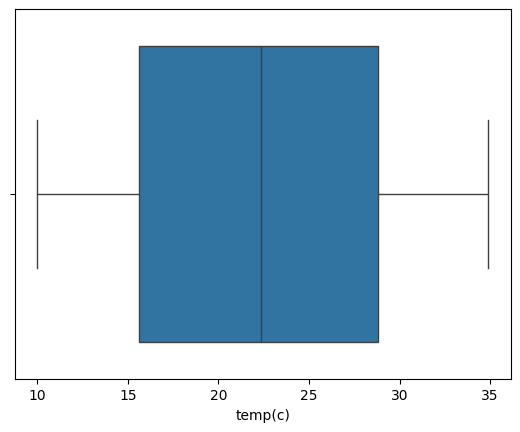

In [49]:
import seaborn as sns
sns.boxplot(x=df['temp(c)'])


In [50]:
Q1 = df['temp(c)'].quantile(0.25)
Q3 = df['temp(c)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_temp = df[(df['temp(c)'] < lower_bound) | (df['temp(c)'] > upper_bound)]
print(f"Temperature outliers found: {len(outliers_temp)}")


Temperature outliers found: 0


# Rainfall Outliers (rainfall(mm))

In [51]:
Q1 = df['rainfall(mm)'].quantile(0.25)
Q3 = df['rainfall(mm)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_rain = df[(df['rainfall(mm)'] < lower_bound) | (df['rainfall(mm)'] > upper_bound)]
print(f"Rainfall outliers found: {len(outliers_rain)}")


Rainfall outliers found: 52


<Axes: xlabel='rainfall(mm)'>

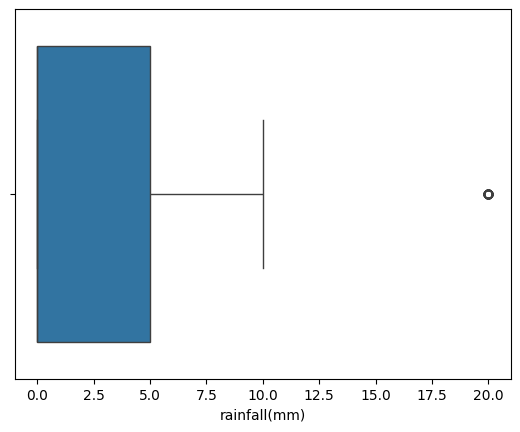

In [52]:
import seaborn as sns
sns.boxplot(x=df['rainfall(mm)'])


In [59]:
df[df['rainfall(mm)']>17].shape

(52, 4)

In [60]:
df.to_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\CLEANED DATA\weather_cleaned.csv",index=False)